# Лаборатоная работа №4

# Многомерная регрессия

<div style = "font-size: 16px">
    <p><b>Цель работы: </b>изучение принципов решения задачи многомерной
регрессии с использованием методов машинного обучения.<p>
    <p>Набор данных содержит информацию о медицинских расходах, взимаемых компаниями медицинского страхования. Содержит подробную информацию о страховых клиентах. Доступ к такой информации позволяет аналитикам лучше понять поведение клиентов и факторы, влияющие на их страховые расходы. Понимая закономерности в этом наборе данных, мы можем получить полезную информацию о том, как возраст, пол и образ жизни могут повлиять на размер страховых взносов человека.</p>
    <p>Атрибуты:</p>
    <ul>
    <li> <b>age</b> – возраст клиента.</li>
    <li> <b>sex</b> – пол (female, male)</li>
    <li> <b>bmi</b> – индекс массы тела</li>
    <li> <b>children</b> – количество детей у клиента.</li>
    <li> <b>smoker</b> – является ли клиент курильщиком (yes, no).</li>
    <li> <b>region</b> – регион, в котором проживает клиент (southwest, southeast, northwest, northeast).</li>
    <li> <b>charges</b> – расходы на страхование (страховые сборы, индивидуальные медицинские расходы, оплачиваемые медицинской страховкой).</li>
    </ul>
    <p>Индекс массы тела – ИМТ (body mass index – BMI). Рассчитывается по формуле: масса тела в килограммах – разделить на квадрат роста в метрах. В соответствии с рекомендациями ВОЗ результаты интерпретируют следующим образом:</p>
    <ul>
    <li> 16 и менее – выраженный дефицит массы тела.</li>
    <li> 16...18,5 – недостаточная (дефицит) масса тела.</li>
    <li> 18,5...25 – нормальная масса тела.</li>
    </ul>
</div>

### 1. Импортируйте необходимые библиотеки

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Получим информацию о датасете

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3. Проверим наличие пропущенных значений и выбросов

In [20]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### 4. Заменяем категориальные данные числовыми

In [21]:
df_copy = df.copy()
sex_map = {'male': 0, 'female': 1}
df_copy['sex'] = df_copy['sex'].map(sex_map)

smoker_map = {'no': 0, 'yes': 1}
df_copy['smoker'] = df_copy['smoker'].map(smoker_map)

df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [22]:
(unique, counts) = np.unique(df['region'], return_counts=True)
print("Unique values of the variable: ", unique)
print("Counts: ", counts)

Unique values of the variable:  ['northeast' 'northwest' 'southeast' 'southwest']
Counts:  [324 325 364 325]


In [23]:
from sklearn.preprocessing import LabelEncoder

labelencoder_o = LabelEncoder()
df_copy['region'] = labelencoder_o.fit_transform(df_copy['region'])
df_copy

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


### 5. Разделяем данные на признаки и целевую переменную

In [26]:
y = df_copy['charges'] 
X = df_copy.drop('charges', axis=1) 
# убедимся, что данные в нужном нам формате
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [27]:
# посмотрим на признаки
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,1
4,32,0,28.880,0,0,1


### 6. Разделяем данные на обучающую и тестовую выборку

<p style = "font-size: 16px">75% данных используется для обучения и 25% — для тестирования.</p>

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 7. Применяем операцию нормализации для численной устойчивости

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# создаём объект класса StandardScaler
scaler = StandardScaler()
scaler

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


### 8. Масштабируем признаки обучающей выборки

In [30]:
X_train_scaled = scaler.fit_transform(X_train)

# убедимся, что объект scaler запомнил значения среднего и СКО для каждого признака
scaler.mean_, scaler.scale_

(array([39.23529412,  0.50747757, 30.7197657 ,  1.07676969,  0.20239282,
         1.56829511]),
 array([14.05311355,  0.49994408,  6.23040428,  1.20694597,  0.40178348,
         1.10472193]))

### 9. Обучаем модель линейной регрессии

In [31]:
# применим масштабирование данные для обучения модели линейной регрессии
model = LinearRegression().fit(X_train_scaled, y_train)
model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### 10. Делаем прогноз на основе данных тестирования

In [32]:
# преобразуем тестовые данные с использованием среднего и СКО, расчитанных на обучающей выборке
# так тестовые данные не повлияют на обучение модели, и мы избежим утечки данных
X_test_scaled = scaler.transform(X_test)

# сделаем прогноз на стандартизированных тестовых данных
y_pred = model.predict(X_test_scaled)
# выведем первые пять значений с помощью диапозона индексов
y_pred[:5]

array([10947.91401491,  9764.82733066, 38027.18625354, 16076.26656375,
        7003.05093861])

In [33]:
# импортируем функцию корня среднеквадратической ошибки
from sklearn.metrics import root_mean_squared_error

# сравним тестовые и прогнозные значения
print('Root Mean Squared Error (RMSE):',
      root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 5663.358417062195


In [34]:
# посмотрим на еще одну метрику - коэффициент детерминации R2
from sklearn.metrics import r2_score
print('R2:', np.round(r2_score(y_test, y_pred), 2))

R2: 0.8


In [35]:
# оценим R-квадрат (метрика (score) по умолчанию для класса LinearRegression)
model.score(X_test_scaled, y_test)

0.7962732059725786

### 11. Итоговое уравнение

In [36]:
# Коэффициенты
print ('Coefficients: ', model.coef_)

Coefficients:  [ 3.52083273e+03 -1.82525656e+00  2.01168481e+03  5.43303645e+02
  9.48294040e+03 -3.76979732e+02]


In [37]:
# Свободны член
print ('Intercept: ', model.intercept_)

Intercept:  13215.863224207376


### 12. Оценим виляние признаков на целевую переменную

In [40]:
df_copy.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,-0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


### 13. Визуализация результатов регрессии

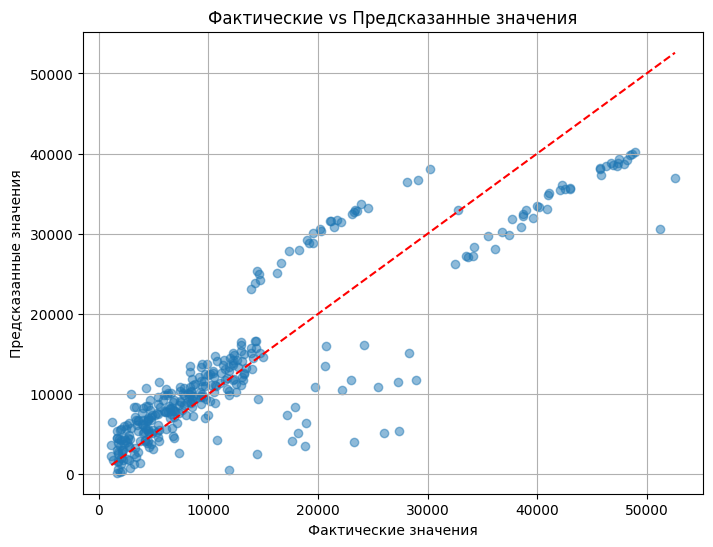

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.grid()
plt.show()

### 14. Остатки регресиии (Residuals Plot)

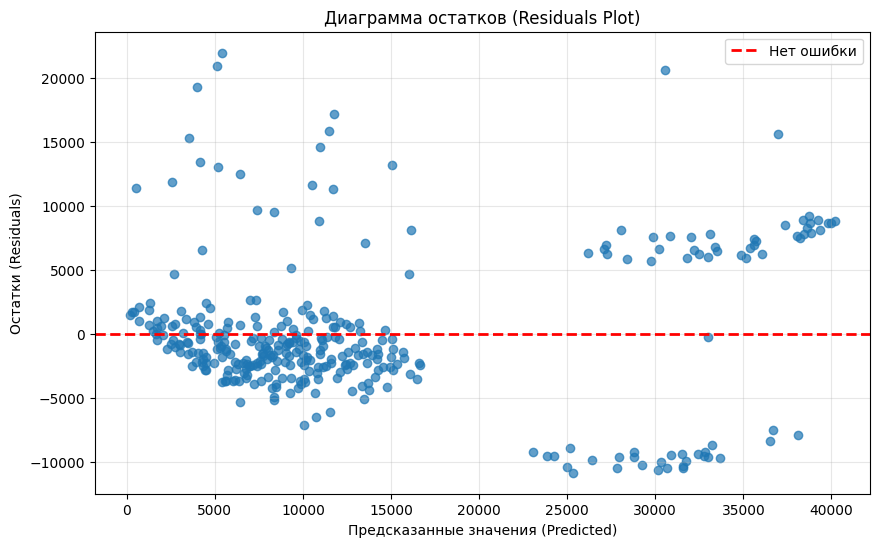

In [42]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Нет ошибки')
plt.xlabel("Предсказанные значения (Predicted)")
plt.ylabel("Остатки (Residuals)")
plt.title("Диаграмма остатков (Residuals Plot)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()